In [1]:
# Params

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

IMGS_ORIGIN = "./original_imgs/"
DATASET_DIR = "./dataset/"
TRAIN_DIR = DATASET_DIR + "train/"
VALIDATION_DIR = DATASET_DIR + "validation/"
TEST_DIR = DATASET_DIR + "test/"
TRAIN_DOGS_PATH = DATASET_DIR + "train/dogs/"
TRAIN_CATS_PATH = DATASET_DIR + "train/cats/"
VALIDATION_DOGS_PATH = DATASET_DIR + "validation/dogs/"
VALIDATION_CATS_PATH = DATASET_DIR + "validation/cats/"
TEST_DOGS_PATH = DATASET_DIR + "test/dogs/"
TEST_CATS_PATH = DATASET_DIR + "test/cats/"

In [6]:
import os
import h5py
import matplotlib.pyplot as plt
import tensorflow
from keras import layers, models, optimizers
import keras
from keras.preprocessing.image import ImageDataGenerator
import glob
import shutil

In [12]:
# Prepare Dataset


for i in range(0,12000):
    train_dogs = glob.glob(IMGS_ORIGIN + "train/dog." + str(i) + ".jpg")
    train_cats = glob.glob(IMGS_ORIGIN + "train/cat." + str(i) + ".jpg")
    shutil.copy(train_dogs[0], TRAIN_DOGS_PATH)
    shutil.copy(train_cats[0], TRAIN_CATS_PATH)
    
for i in range(12000,12500):
    test_dogs = glob.glob(IMGS_ORIGIN + "train/dog." + str(i) + ".jpg")
    test_cats = glob.glob(IMGS_ORIGIN + "train/cat." + str(i) + ".jpg")
    shutil.copy(test_dogs[0], TEST_DOGS_PATH)
    shutil.copy(test_cats[0], TEST_CATS_PATH)

for i in range(12000,12500):
    test_dogs = glob.glob(IMGS_ORIGIN + "train/dog." + str(i) + ".jpg")
    test_cats = glob.glob(IMGS_ORIGIN + "train/cat." + str(i) + ".jpg")
    shutil.copy(test_dogs[0], VALIDATION_DOGS_PATH)
    shutil.copy(test_cats[0], VALIDATION_CATS_PATH)

In [11]:
# Cleanup Dataset

targets = glob.glob(DATASET_DIR + "*/*/*.jpg")
for i in targets:
    os.remove(i)
print("{} images deleted.".format(len(targets)))

26000 images deleted.


In [13]:
# Verify Dataset

train_dogs_imgs = glob.glob(TRAIN_DOGS_PATH + "*.jpg")
train_cats_imgs = glob.glob(TRAIN_CATS_PATH + "*.jpg")
validation_dogs_imgs = glob.glob(VALIDATION_DOGS_PATH + "*.jpg")
validation_cats_imgs = glob.glob(VALIDATION_CATS_PATH + "*.jpg")
test_dogs_imgs = glob.glob(TEST_DOGS_PATH + "*.jpg")
test_cats_imgs = glob.glob(TEST_CATS_PATH + "*.jpg")
print(len(train_dogs_imgs), len(train_cats_imgs), len(validation_dogs_imgs), len(validation_cats_imgs), len(test_dogs_imgs), len(test_cats_imgs),)

12000 12000 500 500 500 500


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

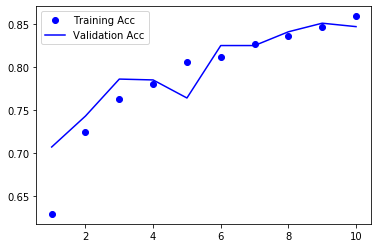

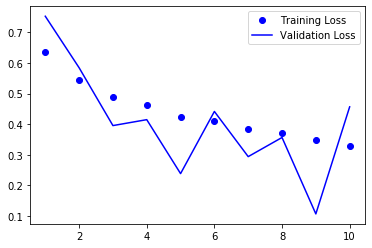

In [14]:
# Learn

def construct_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64,(3,3),activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128,(3,3),activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128,(3,3),activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(512,activation="relu"))
    model.add(layers.Dense(1,activation="sigmoid"))

    model.summary()

    model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])
    preprocess_imgs(model)


def preprocess_imgs(model):
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary"
    )
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary"
    )
    print(train_generator.class_indices, validation_generator.class_indices)
    learn(model, train_generator, validation_generator)


def learn(model, train_generator, validation_generator):
    history = model.fit_generator(train_generator,
                                  steps_per_epoch=600,
                                  epochs=10,
                                  validation_data=validation_generator,
                                  validation_steps=500)
    model.save('./dogorcat.h5')
    show_result(history)


def show_result(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1,len(acc) + 1)

    plt.plot(epochs, acc,"bo",label="Training Acc")
    plt.plot(epochs, val_acc,"b",label="Validation Acc")
    plt.legend()

    plt.figure()

    plt.plot(epochs,loss,"bo",label="Training Loss")
    plt.plot(epochs,val_loss,"b",label="Validation Loss")
    plt.legend()

    plt.show()


if __name__ == "__main__":
    construct_model()

In [15]:
# Test,Evalute

model = keras.models.load_model('./dogorcat.h5', compile = False)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)
test_generator[0]

Found 1000 images belonging to 2 classes.


50

In [3]:
# GPU Verify

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17474936802977881624,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18079156596494614728
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7665726260
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5950110877717689720
 physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10052552573686598685
 physical_device_desc: "device: XLA_GPU device"]